1.  **Import Necessary Libraries:** This is the first step where we import all the necessary libraries. We need pandas for data manipulation and analysis, numpy for numerical operations, matplotlib and seaborn for data visualization, and sklearn's StandardScaler for feature scaling.

In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

2. **Load the Data**: In this step, we load the data from a CSV file into a pandas DataFrame. A DataFrame is a two-dimensional labeled data structure with columns potentially of different types. It is generally the most commonly used pandas object.

In [3]:
# 2. Load the Data
df = pd.read_csv('video_games_sales.csv')

3. **Inspect the Data**: Here, we take a quick look at the data using the `head()`, `info()`, and `describe()` methods. `head()` displays the first few rows in the DataFrame, `info()` provides a summary of the DataFrame including the number of non-null entries in each column, and `describe()` generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution.

In [4]:
# 3. Inspect the Data
print(df.head())
print(df.info())
print(df.describe())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

4. **Check for Missing Values**: Missing data in the dataset can reduce the statistical power of a model and can lead to a biased or incorrect prediction. So, we need to identify and handle missing values. We use `isnull().sum()` to check for missing values in each column.

In [5]:
# 4. Check for Missing Values
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


5. **Handle Missing Values**: Once we have identified the missing values, we need to handle them in an appropriate manner. Here, we fill missing values in numeric columns with the mean of the respective column. This is a simple and often effective way of handling missing values. However, it might not be the best strategy for all datasets or all columns in a dataset.

In [6]:
# 5. Handle Missing Values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

6. **Check for Duplicate Values**: Duplicate rows can skew the results of our analysis. So, we need to identify and handle duplicate values. We use `duplicated().sum()` to check for duplicate rows in the DataFrame.

In [7]:
# 6. Check for Duplicate Values
print(df.duplicated().sum())

0


7. **Remove Duplicate Values**: If there are duplicates, we remove them using the `drop_duplicates()` function.

In [8]:
# 7. Remove Duplicate Values
df.drop_duplicates(inplace=True)

8. **Visualize the Data**: Data visualization is an important aspect of EDA. It allows us to understand patterns, trends, and correlations in a visual manner. Here, we create histograms with kernel density estimation curves for each column in the DataFrame.

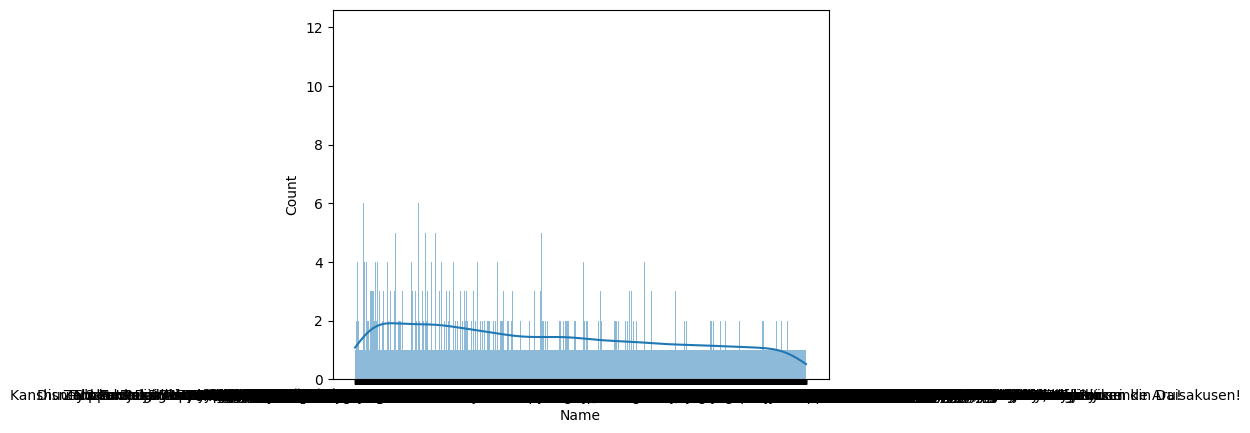

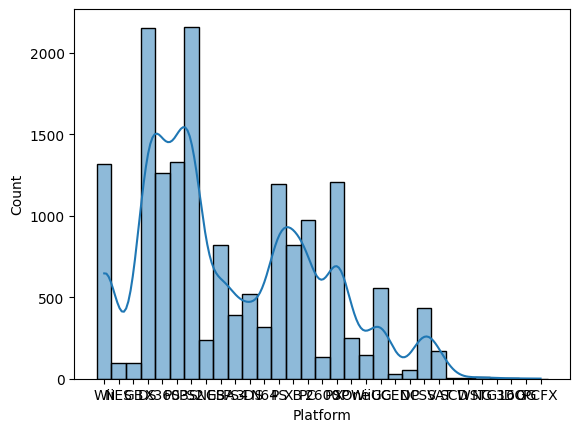

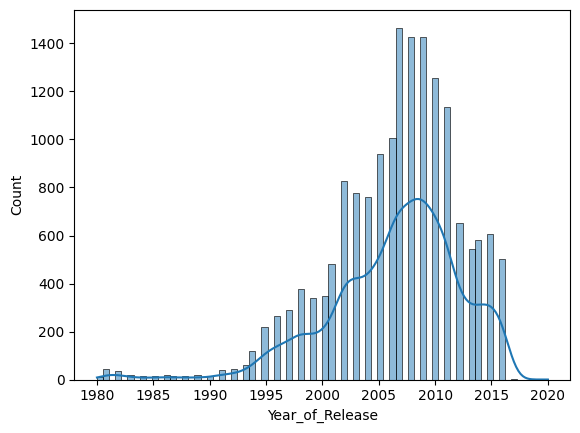

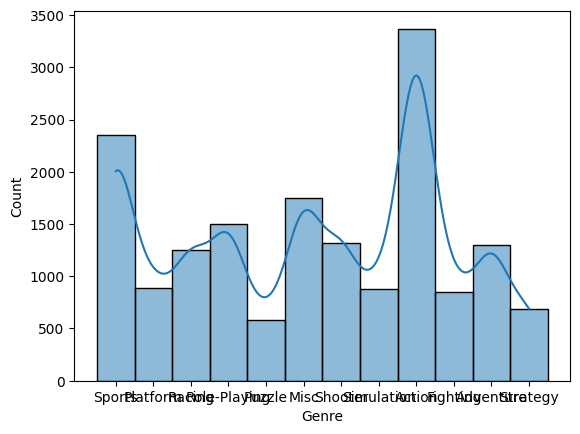

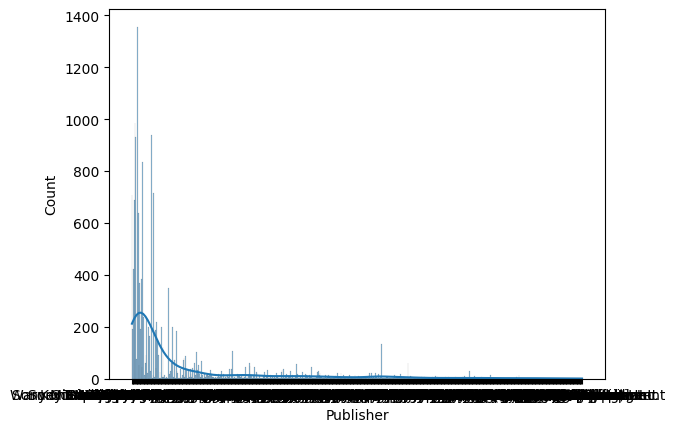

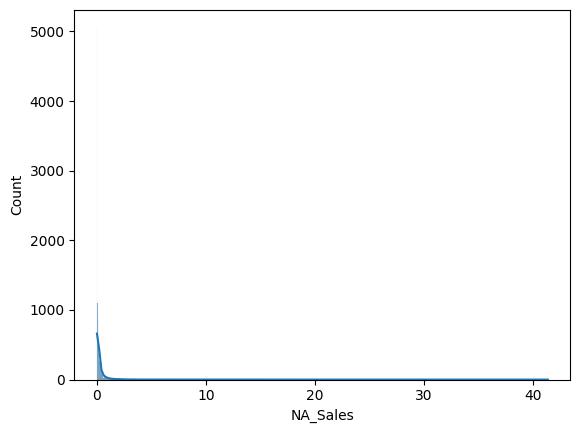

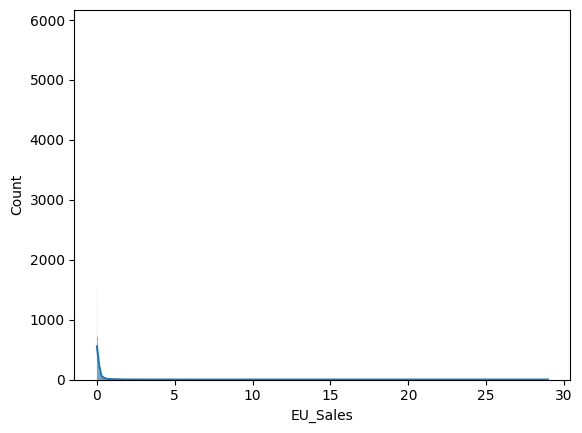

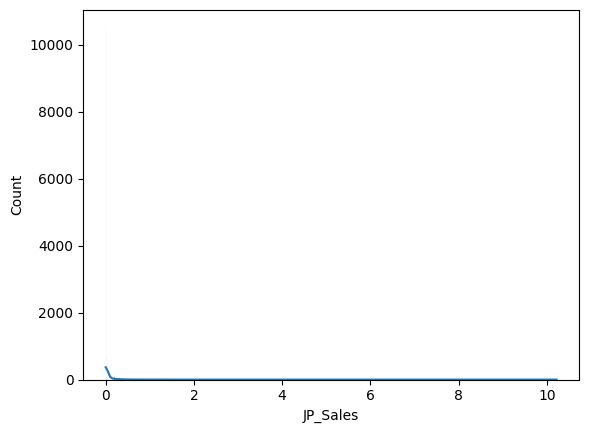

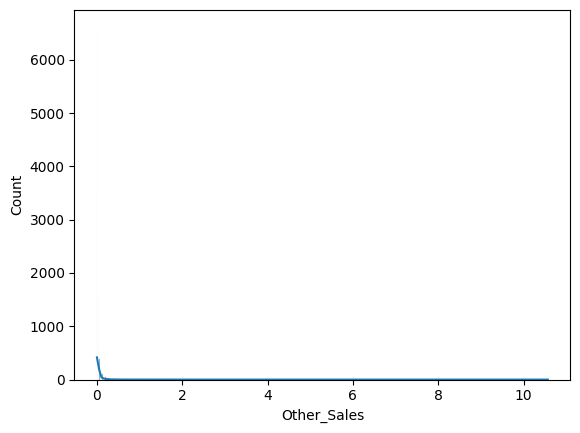

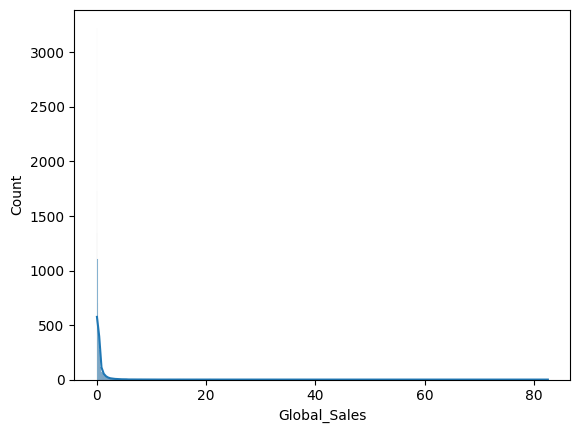

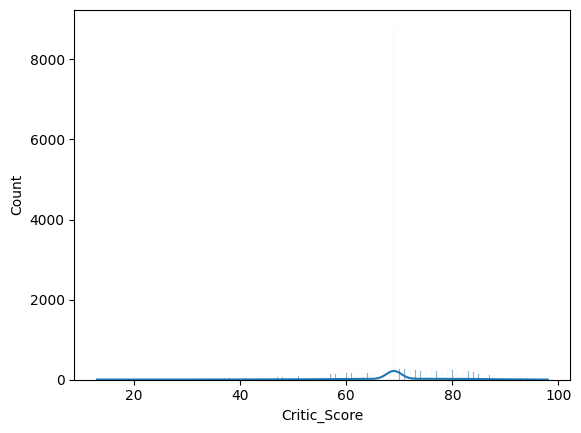

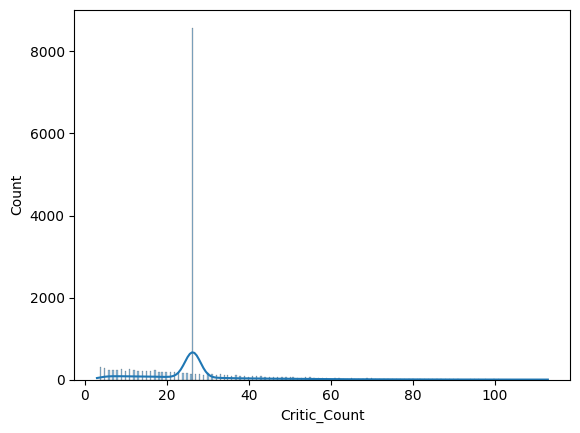

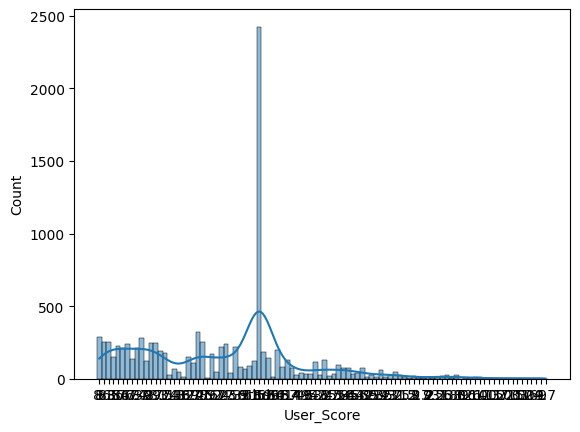

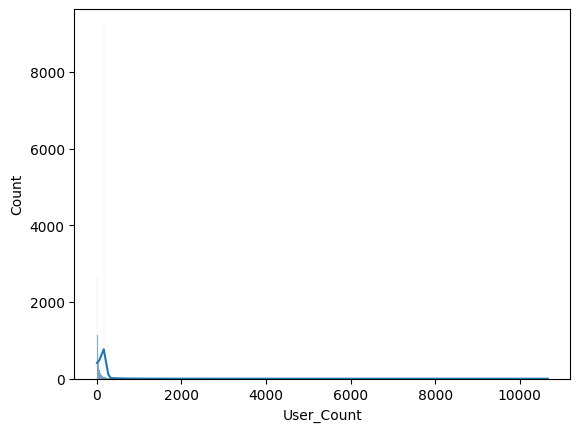

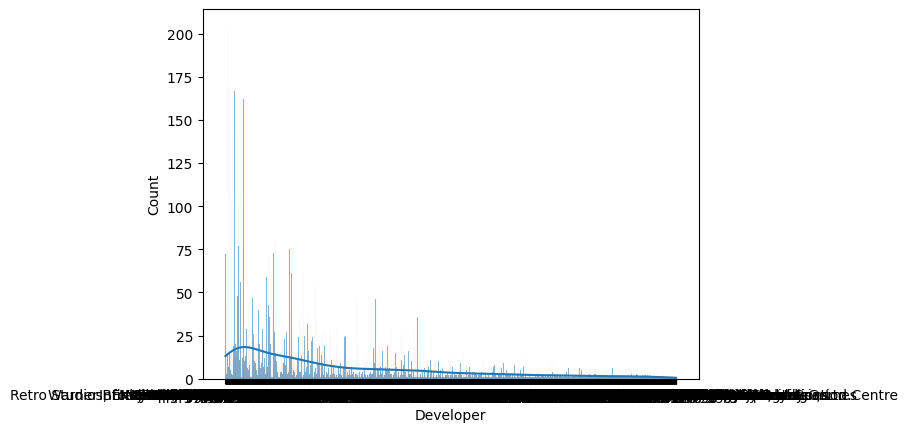

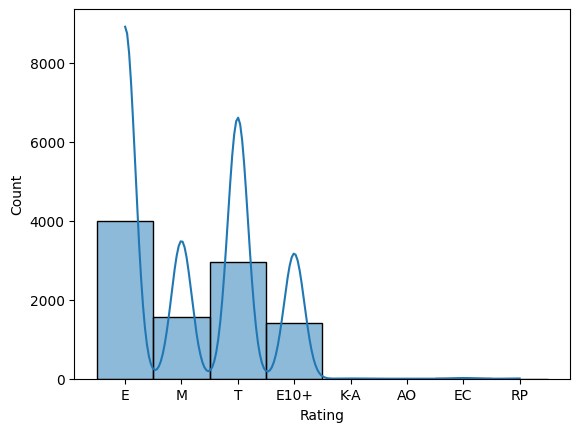

In [9]:
# 8. Visualize the Data
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

9. **Check Data Distribution**: We create histograms for each column to check the distribution of data. This can help identify skewness, outliers, or other distribution characteristics.

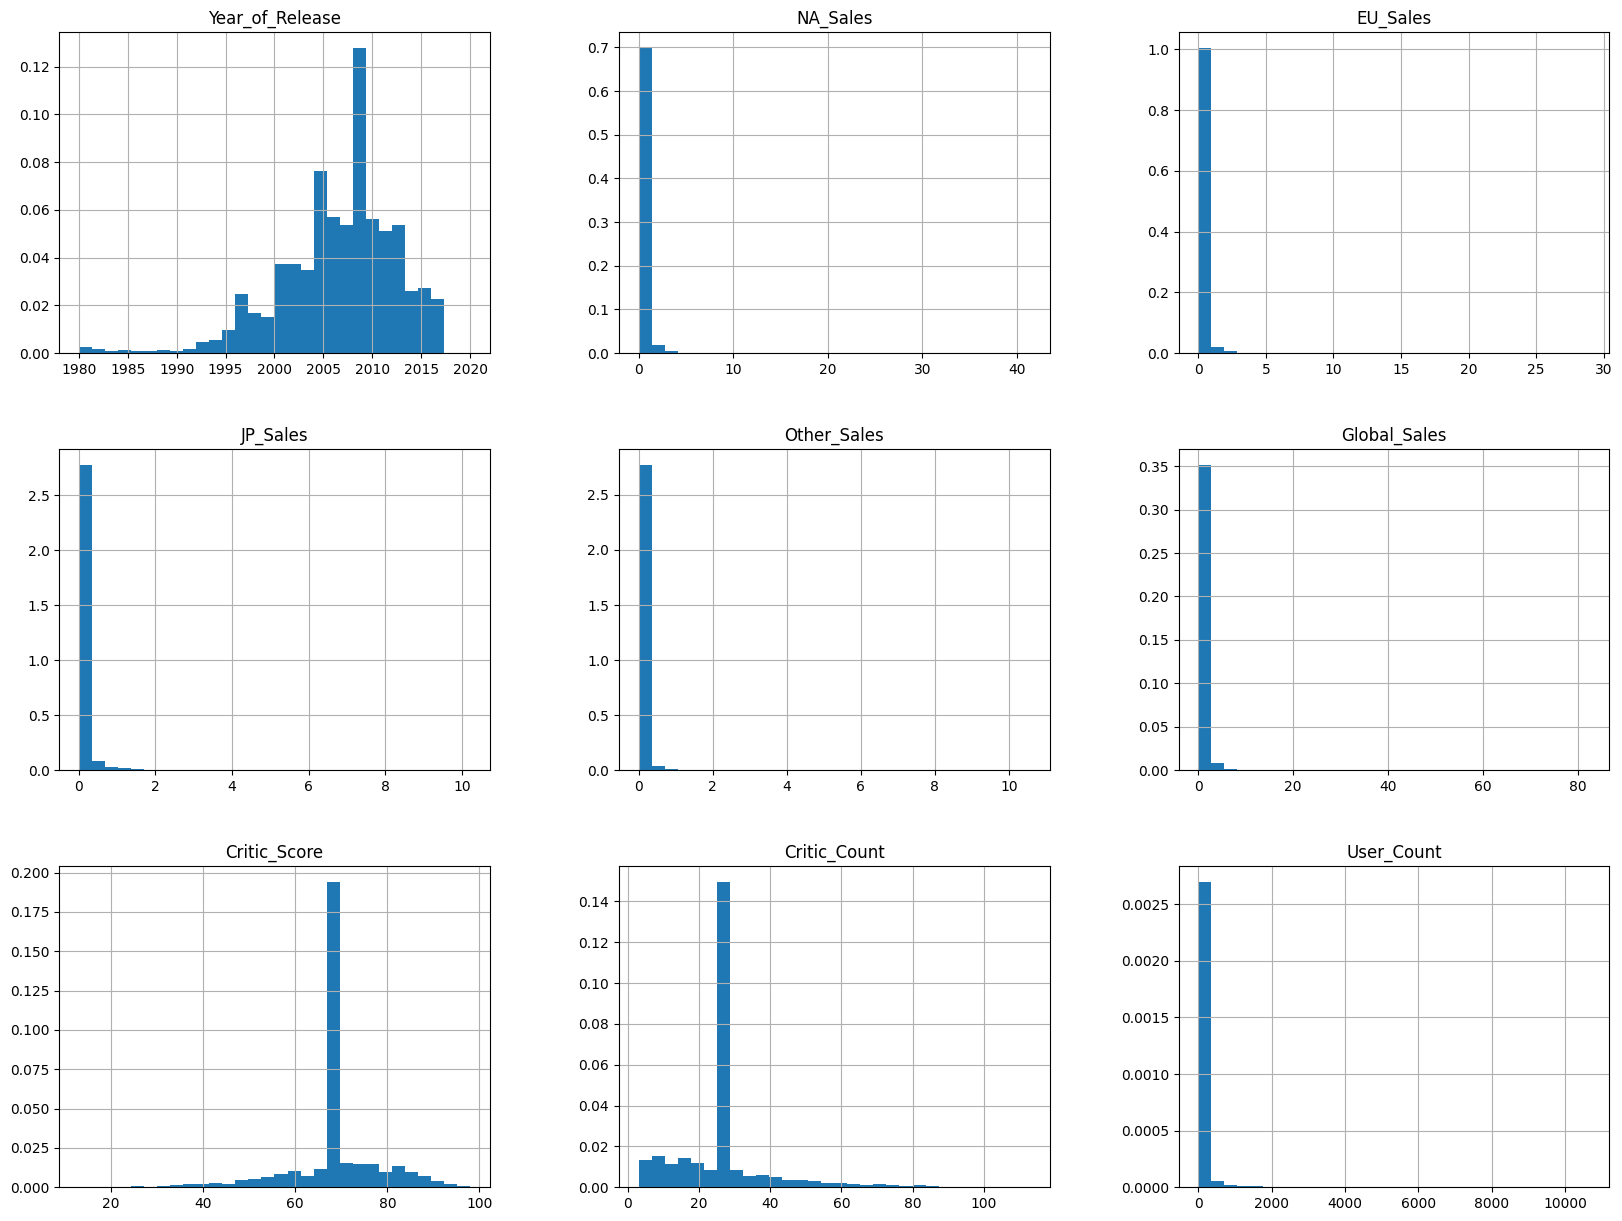

In [10]:
# 9. Check Data Distribution
df.hist(bins=30, figsize=(20,15), density=True)
plt.show()

10. **Check Correlations**: Correlation is a statistical measure that describes the association between random variables. We create a heatmap of the correlation matrix of the DataFrame. This helps us understand the relationships between different variables in the dataset.

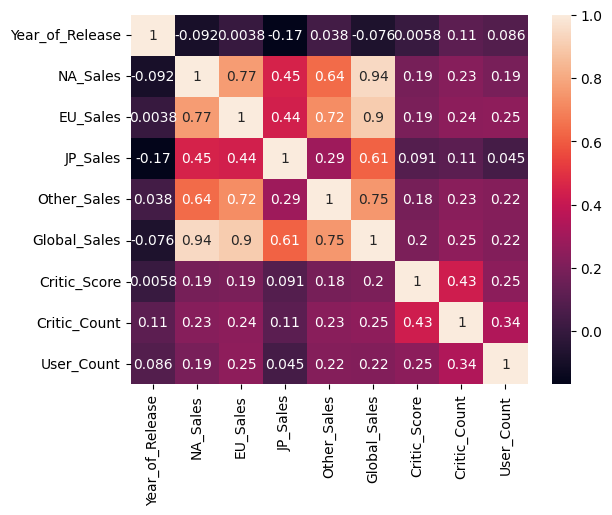

In [11]:
# 10. Check Correlations
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.show()

11. **Handle Categorical Variables**: Machine learning algorithms require input to be in numerical format. However, our dataset may contain categorical variables. These need to be converted into numerical format. Here, we use one-hot encoding to convert categorical variables into a form that can be used by machine learning algorithms.

In [13]:
# 11. Handle Categorical Variables
df = pd.get_dummies(df, drop_first=True)

12. **Outlier Detection**: Outliers are data points that are significantly different from other observations. They can significantly impact the results of our analysis and statistical models. Here, we use the IQR method to detect and remove outliers from the DataFrame.

In [14]:
# 12. Outlier Detection
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

13. **Feature Scaling**: Feature scaling is a method used to standardize the range of independent variables or features of data. We use sklearn's StandardScaler to scale all numeric columns in the DataFrame to have a mean of 0 and a standard deviation of 1.

In [ ]:
# 13. Feature Scaling
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)